# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du [Cours TAL](https://cyberlearn.hes-so.ch/course/view.php?id=14966) est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3.7 ou 3.8](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais (1b et 1c), puis en français (1d).

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Pour utiliser NLTK en Python (y compris dans un _notebook_ Jupyter), vous pouvez écrire `import nltk`, puis accéder à toutes les commandes avec le préfixe `nltk.`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements qui peut être invoqué depuis un interpréteur Python en ligne de commande (écrire `python3` en ligne de commande) avec les deux commandes `import nltk` puis `nltk.download()`.  Cela vous permettra de télécharger de nombreux corpus _additionnels_ (i.e. collections de textes), mais que nous n'utiliserons pas en laboratoire.

In [1]:
import nltk
#from nltk.book import *

Écrivez une phrase en anglais (liste de mots / string) que vous appelerez `sentence1`.  

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, trier les bi-grammes par ordre alphabétique et afficher le résultat.

In [2]:
# Please write your Python code in this cell and execute it.
sentence1 = "Hello world, how is the weather today?"
print("My sentence has length :",len(sentence1))

bigrams = nltk.bigrams(sentence1.split())
list(sorted(bigrams))

My sentence has length : 38


[('Hello', 'world,'),
 ('how', 'is'),
 ('is', 'the'),
 ('the', 'weather'),
 ('weather', 'today?'),
 ('world,', 'how')]

Défnissez une chaîne appelée `string2` contenant une phrase.  Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [3]:
# Please write your Python code in this cell and execute it.
string2 = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque blandit nisl faucibus, tempor massa non, posuere ligula. Ut dignissim blandit maximus. Donec ornare tincidunt tortor."
sentence2 = nltk.word_tokenize(string2)
print(sentence2)

['Lorem', 'ipsum', 'dolor', 'sit', 'amet', ',', 'consectetur', 'adipiscing', 'elit', '.', 'Pellentesque', 'blandit', 'nisl', 'faucibus', ',', 'tempor', 'massa', 'non', ',', 'posuere', 'ligula', '.', 'Ut', 'dignissim', 'blandit', 'maximus', '.', 'Donec', 'ornare', 'tincidunt', 'tortor', '.']


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stocker le contenu dans une chaîne.

In [4]:
from urllib import request
# Please write your Python code below and execute it.
url = "https://www.gutenberg.org/cache/epub/30691/pg30691.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
last_intro_sentence = "*** START OF THIS PROJECT GUTENBERG EBOOK ASTOUNDING STORIES, DEC. 1930 ***"
start_of_book = raw.index(last_intro_sentence) + len(last_intro_sentence)
first_outro_sentence = "*** END OF THIS PROJECT GUTENBERG EBOOK ASTOUNDING STORIES, DEC. 1930 ***"
end_of_book = raw.index(first_outro_sentence) - 1

En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder le texte principal.  Vous pouvez utiliser la notation dite de *slicing* en Python, ou identifier les chaînes où commence et finit le véritable texte.  Quelle est la longueur de ce texte en caractères ?  (Lien utile : [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).)

In [5]:
# Please write your Python code below and execute it.
text = raw[start_of_book:end_of_book]
len(text)

466050

Vous allez maintenant segmenter le texte en phrases et les écrire dans un fichier avec une phrase par ligne.  Vous allez également segmenter chaque phrase en _tokens_ (mots et ponctuations), et créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  Vous aurez besoin des fonctions suivantes de nltk:
* `nltk.sent_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (notez que le nom "sentence tokenize" n'est pas très logique)
* `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**Segmentez le texte en phrases avec NLTK.** Affichez le nombre de phrases obtenues, et un court extrait de 5-6 phrases.  Comment appréciez-vous la qualité de la segmentation ?  *Note :* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`.

In [6]:
# Please write your Python code in this cell and execute it.
text = (text.replace('\r\n', ' ')
        .replace('"', '')
        .replace("*       *       *       *       *", "")
       )
x = 4500
book_sentences = nltk.sent_tokenize(text)
book_sentences[x:x+5]

['Not even nymphs could be as graceful as were the twenty-six girls who were performing the dance of Life Immortal, which tradition decreed should be given before the ceremony by which, in this realm, two souls were wedded.',
 'The flash of rainbow gowns was like the swirling of light in a sky at dawning.',
 'The music of voices, flutes, and the little gongs of jade, would have stirred the souls of the dead.',
 'If only the confounded sense of approaching disaster would leave him, Kirby thought grimly, this would be a magnificent moment.',
 'As it was, he turned his eyes away from the girls, and began to examine the temple.']

Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [7]:
import os
if not os.path.exists('Texts'):
    os.makedirs('Texts')
if not os.path.exists('Data'):
    os.makedirs('Data')

In [8]:
filename1 = "./Texts/sample_text_1.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)
fd = open(filename1, 'a', encoding='utf8')
# Please write your Python code below and execute it.
for line in book_sentences:
    fd.write(line)
    fd.write('\n')
fd.close()

**Segmentez maintenant chaque phrase en tokens (mots et ponctuations).**  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez quelques phrases et commentez la qualité de la tokenisation.

In [9]:
# Please write your Python code in this cell and execute it.
token_segmented_sentences = [nltk.word_tokenize(sentence) for sentence in book_sentences]
token_segmented_sentences[102]

['Hale', "'s", 'warm', 'glance', 'swept', 'over', 'her', '.']

Calculez le nombre total de _tokens_ obtenus.

In [10]:
# Please write your Python code in this cell and execute it.
import functools
f = lambda x,y : x + len(y)
functools.reduce(f, token_segmented_sentences, 0)

91790

Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne et en insérant un espace entre chaque _token_.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [11]:
filename2 = "./Texts/sample_text_2.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt
if os.path.exists(filename2): 
    os.remove(filename2)
fd = open(filename2, 'a', encoding='utf8')
# Please write your Python code below and execute it.
for line in token_segmented_sentences:
    fd.write(" ".join(line))
    fd.write('\n')
fd.close()

Il est également possible de *tokeniser un texte sans le segmenter préalablement en phrases*.
* Effectuez cette opération directement sur la chaîne de caractères contenant tout le texte.  
* Affichez et observez un court extrait. 
* Demandez le nombre total de tokens et comparez-le avec le nombre précédent.  
* Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [12]:
# Please write your Python code in this cell and execute it.
direct_segmented_text = nltk.word_tokenize(text)
len(direct_segmented_text)

91790

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  Ces objets peuvent être créés avec : 
1. la chaîne de caractères constituant le texte
2. la liste de tous les mots du texte (chaînes)
3. la liste de toutes les phrases (liste de listes)

**Attention:**

* seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`
* les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`

Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  (Vous pouvez appeler ici `nltk.word_tokenize`.)

In [13]:
# Please write your Python code in this cell and execute it.
text_for_stats = nltk.Text(direct_segmented_text)

Le [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) montre des exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.  Par exemple, on peut afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`, ou trouver des mots qui ont des contextes semblables à un mot donné avec `similar`.  Veuillez expérimenter ci-dessous avec ces deux méthodes et afficher un résultat à chaque fois.

In [14]:
# Please write your Python code in this cell and execute it.
text_for_stats.concordance('police')


Displaying 17 of 17 matches:
small crowd were a dozen of the red police . I tell you , comrades , the speak
 swelled from the crowd and the red police roused from their lethargy . The mo
port of the besieged visitors . The police were , for the moment , overwhelmed
 pavement . A lieutenant of the red police was shouting his orders and the din
he gray , and to certain of the red police , it was well known . Rudolph Krass
marveled at the patience of the red police . To-day , these newcomers , obviou
ral flash-lamps in the hands of the police . They were searching for survivors
he shadow of a pillar while the red police passed by in their search of the Sq
be overhead . A sergeant of the red police looked up startled from his desk as
 in the red uniform of a captain of police , the other a pompous , whiskered m
l . The room became quiet while the police captain thumbed the pages of a huge
 were on edge . Then the captain of police looked up from the book and there w
uld he have committed ?

In [15]:
# Please write your Python code in this cell and execute it.
text_for_stats.similar('police')

guards women power buildings city chamber purple girls the stories
sale day all to scene venus skies like xlotli men


En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations les plus fréquentes dans votre texte.

In [16]:
# Please write your Python code in this cell and execute it.
text_for_stats.collocation_list()

[('Dr.', 'Bird'),
 ('Sir', 'Basil'),
 ('Unani', 'Assu'),
 ('New', 'York'),
 ('Van', 'Dorn'),
 ('Astounding', 'Stories'),
 ('Dear', 'Editor'),
 ('Professor', 'Sykes'),
 ("'ve", 'got'),
 ('Coast', 'Guard'),
 ('Lieutenant', 'McGuire'),
 ('red', 'police'),
 ('Commander', 'Minden'),
 ('gray', 'denim'),
 ('young', 'man'),
 ('could', 'see'),
 ('United', 'States'),
 ('Ray', 'Cummings'),
 ('two', 'men'),
 ('August', 'issue')]

On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste des _types_) simplement en convertissant la liste des mots (occurrences ou _tokens_) à un `set` en Python.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [17]:
# Please write your Python code in this cell and execute it.
token_set = set(direct_segmented_text)
print('Number of different tokens:', len(token_set))
filtered = filter(lambda x : len(x) > 15, token_set)
list(filtered)

Number of different tokens: 9082


['conscience-stricken',
 'responsibilities',
 'What-You-Call-It',
 'rubber-gatherers',
 'super-laboratory',
 'characteristically',
 'Interdimensional',
 'downward-winding',
 'feather-decorated',
 'profanity-filled',
 'cliff-surrounded',
 'semi-conventionalized',
 'indiscriminately',
 'molecule-disintegrator']

**Distributions de fréquence (Frequency Distributions)**

NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text`.  Le résultat est stocké dans un objet de type `FreqDist` (pour _frequency distribution_) comme montré dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de là, on peut déterminer les mots les plus fréquents.

Veuillez construire la distribution de fréquences de votre texte.

In [18]:
# Please write your Python code in this cell and execute it.
freq_dist = nltk.FreqDist(text_for_stats)

Affichez les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

In [19]:
# Please write your Python code in this cell and execute it.
most_common_70 = freq_dist.most_common(70)
list(filter(lambda x : len(x[0]) >= 4, most_common_70))

[('that', 986),
 ('with', 567),
 ('from', 448),
 ('were', 425),
 ('which', 402),
 ('Kirby', 399),
 ('they', 381),
 ('them', 367),
 ('have', 296),
 ('their', 266),
 ('Naida', 259),
 ('into', 248),
 ('this', 237),
 ('there', 199),
 ('what', 182),
 ('would', 179),
 ('been', 178),
 ('could', 169),
 ('said', 163),
 ('eyes', 162),
 ('then', 159)]

## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

Nous allons utiliser les fonctions graphiques de NLTK, mais il est possible de générer directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

In [20]:
import matplotlib.pyplot
%matplotlib inline

Affichez le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

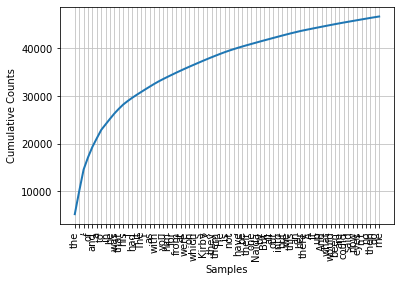

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [21]:
# Please write your Python code in this cell and execute it.
freq_dist.plot(70, cumulative=True)


Maintenant, construisez une liste avec la longueur de chaque _token_ du texte (la liste aura donc autant de nombres que de tokens).  Créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (cette fois-ci _non_-cumulative) des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

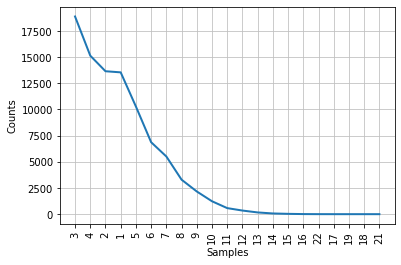

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
# Please write your Python code in this cell and execute it.
token_size_list = list(map(lambda x: len(x), direct_segmented_text))
token_size_stats = nltk.FreqDist(nltk.Text(token_size_list))
token_size_stats.plot(70, cumulative=False)

## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1c et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 